## Importing libraries

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import joblib
from sklearn.metrics import classification_report

## Dataset

In [ ]:
df=pd.read_csv('heart.csv') 
df.tail(150)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2,1
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df['sex'].unique()
df['cp'].unique()
df['output'].unique()

array([1, 0], dtype=int64)

In [ ]:
df['age'].unique()
df['trtbps'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

In [ ]:
print("Patients who do not have disease : ",len(df.loc[df['output'] == 0]))
print("Patients who have disease : ",len(df.loc[df['output'] == 1]))

Patients who do not have disease :  138
Patients who have disease :  165


In [ ]:
df.columns = ['age', 'sex','Chest_Pain_type','resting_blood_pressure','cholestoral','fasting_blood_sugar',
             'resting_electrocardiographic','maximum_heart_rate','exercise_induced_angina','previous_peak','Slope',
             'number_major_vessels','thal_rate','output']

In [ ]:
df.corr().abs()

,age,sex,Chest_Pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,previous_peak,Slope,number_major_vessels,thal_rate,output
age,1.000000,0.098447,0.068653,0.279351,0.213678,0.121308,0.116211,0.398522,0.096801,0.210013,0.168814,0.276326,0.068001,0.225439
sex,0.098447,1.000000,0.049353,0.056769,0.197912,0.045032,0.058196,0.044020,0.141664,0.096093,0.030711,0.118261,0.210041,0.280937
Chest_Pain_type,0.068653,0.049353,1.000000,0.047608,0.076904,0.094444,0.044421,0.295762,0.394280,0.149230,0.119717,0.181053,0.161736,0.433798
resting_blood_pressure,0.279351,0.056769,0.047608,1.000000,0.123174,0.177531,0.114103,0.046698,0.067616,0.193216,0.121475,0.101389,0.062210,0.144931
cholestoral,0.213678,0.197912,0.076904,0.123174,1.000000,0.013294,0.151040,0.009940,0.067023,0.053952,0.004038,0.070511,0.098803,0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,0.084189,0.008567,0.025665,0.005747,0.059894,0.137979,0.032019,0.028046
resting_electrocardiographic,0.116211,0.058196,0.044421,0.114103,0.151040,0.084189,1.000000,0.044123,0.070733,0.058770,0.093045,0.072042,0.011981,0.137230
maximum_heart_rate,0.398522,0.044020,0.295762,0.046698,0.009940,0.008567,0.044123,1.000000,0.378812,0.344187,0.386784,0.213177,0.096439,0.421741
exercise_induced_angina,0.096801,0.141664,0.394280,0.067616,0.067023,0.025665,0.070733,0.378812,1.000000,0.288223,0.257748,0.115739,0.206754,0.436757
previous_peak,0.210013,0.096093,0.149230,0.193216,0.053952,0.005747,0.058770,0.344187,0.288223,1.000000,0.577537,0.222682,0.210244,0.430696


## Feature correlation

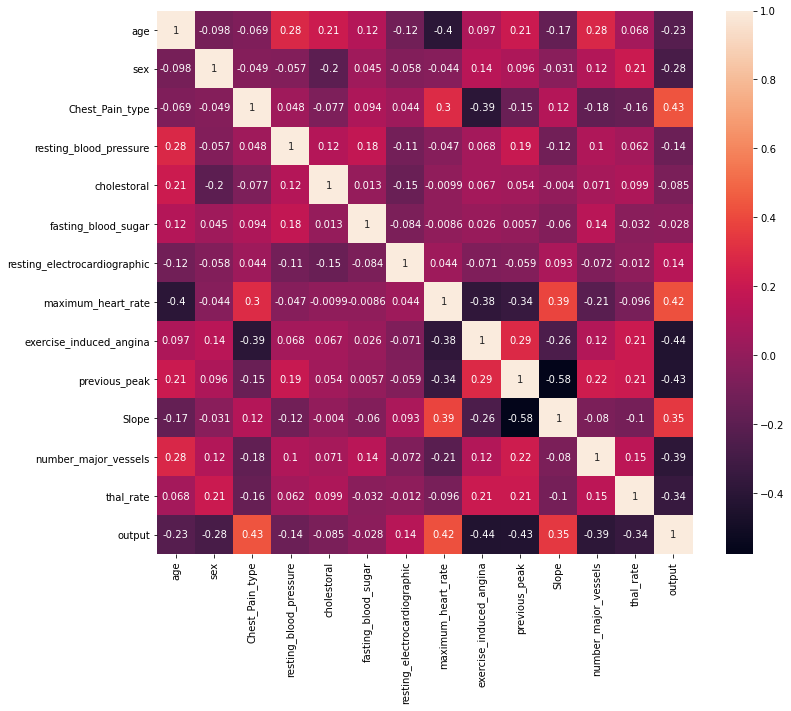

In [ ]:
#Filter Method using Pearson Correlation
plt.figure(figsize=(12,10))
correlation = df.corr()
sns.heatmap(correlation, annot=True)
plt.show()

## Finding and removing highly correlated feature

In [ ]:
correlation_target = abs(correlation["previous_peak"])
same_features = correlation_target[correlation_target>0.5]
print(same_features)
df=df.drop(['Slope'],axis=1)

previous_peak    1.000000
Slope            0.577537
Name: previous_peak, dtype: float64


## Separating Variables

In [ ]:
Input_variables=df.drop(['output'],axis=1)
Output_variable=df['output']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Input_variables.values, Output_variable, train_size=0.8, random_state=0, stratify=Output_variable)

## Random Forest Classifier with Defalut parameters

In [ ]:
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
y_pred_tr=RF.predict(X_train)
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_tr)*100)

metrics.confusion_matrix(y_test, y_pred)

Test Accuracy: 83.60655737704919
Train Accuracy: 100.0


array([[23,  5],
       [ 5, 28]], dtype=int64)

## Parameters setting for Random Forest

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 5)]
max_features = ['sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 50,3)]
min_samples_split = [2,4]
min_samples_leaf = [2,5]
# Create the random grid

pg_rf = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }
print(pg_rf)

rf_em=RandomForestClassifier()

{'n_estimators': [10, 257, 505, 752, 1000], 'max_features': ['sqrt', 'log2'], 'max_depth': [10, 30, 50], 'min_samples_split': [2, 4], 'min_samples_leaf': [2, 5]}


## Finding best parameters

In [ ]:
rf_Grid = GridSearchCV(estimator = rf_em, param_grid = pg_rf, cv = 2 , verbose=2, n_jobs = 4)
rf_Grid.fit(X_train, y_train)

Fitting 2 folds for each of 120 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   19.6s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:  2.1min finished


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [10, 30, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 257, 505, 752, 1000]},
             verbose=2)

In [ ]:
rf_Grid.best_estimator_

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=5,
                       min_samples_split=4, n_estimators=752)

## Random Forest after Optimization

In [ ]:
rf_opt=rf_Grid.best_estimator_
print(rf_opt,'\n')
rf_opt.fit(X_train,y_train)
y_pred_opt=rf_opt.predict(X_test)
print("Test Accuracy After Optimization:",metrics.accuracy_score(y_test, y_pred)*100)
y_pred_tr=rf_opt.predict(X_train)
print("Train Accuracy After Optimization:",metrics.accuracy_score(y_train, y_pred_tr)*100,'\n')


print('Confusion matrix:\n',metrics.confusion_matrix(y_test, y_pred_opt),'\n')

print("Classification Report Random Forest: \n")
print(metrics.classification_report(y_test, y_pred_opt))

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=5,
                       min_samples_split=4, n_estimators=752) 

Test Accuracy After Optimization: 81.9672131147541
Train Accuracy After Optimization: 90.9090909090909 

Confusion matrix:
 [[22  6]
 [ 4 29]] 

Classification Report Random Forest: 

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



## Random Forest Visualizaton

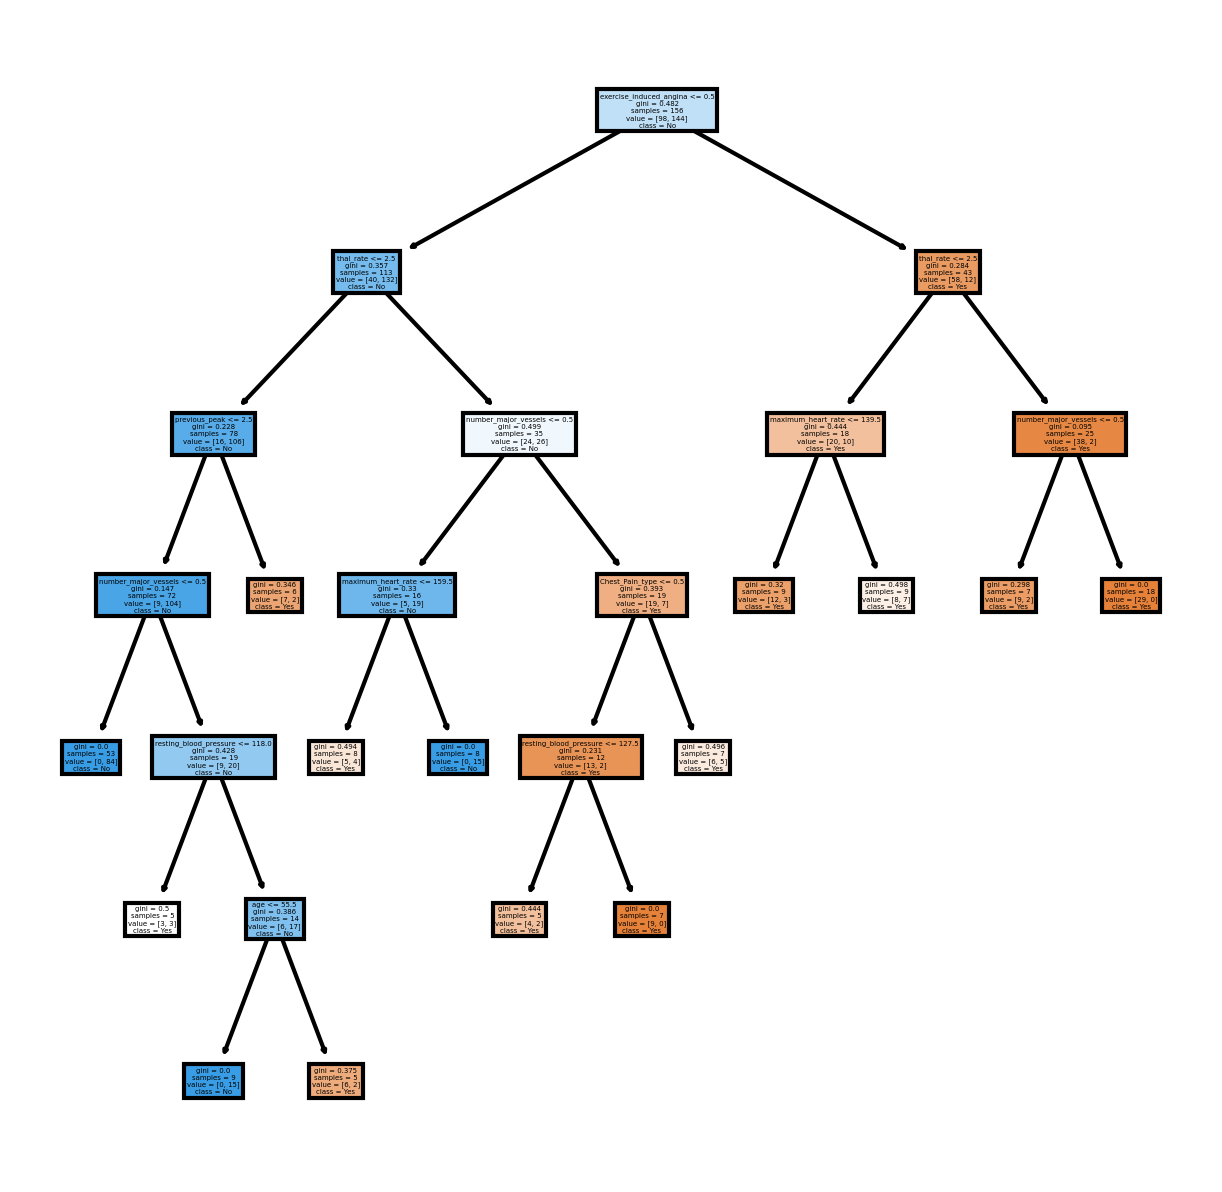

In [ ]:
fn=['age', 'sex', 'Chest_Pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'resting_electrocardiographic',
       'maximum_heart_rate', 'exercise_induced_angina', 'previous_peak',
       'number_major_vessels', 'thal_rate']
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(rf_opt.estimators_[7],
               feature_names = fn, 
               class_names=['Yes','No'],
               filled = True);
fig.savefig('heart_rfc.png')

## Feature Importance for Random Forest Classifier

Feature: 0, Score: 0.07389
Feature: 1, Score: 0.02387
Feature: 2, Score: 0.15796
Feature: 3, Score: 0.03760
Feature: 4, Score: 0.04508
Feature: 5, Score: 0.00314
Feature: 6, Score: 0.01285
Feature: 7, Score: 0.09011
Feature: 8, Score: 0.13114
Feature: 9, Score: 0.13483
Feature: 10, Score: 0.13456
Feature: 11, Score: 0.15497


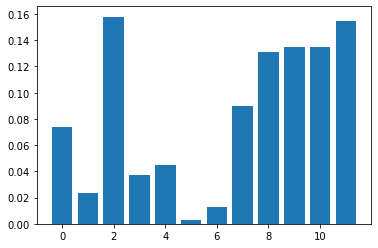

In [ ]:
feature_importance = rf_opt.feature_importances_
# summarize feature importance
for i,v in enumerate(feature_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(feature_importance))], feature_importance)
plt.show()

## Feature Ranking for RFC

In [ ]:
import numpy as np
importances = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(Input_variables.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 2 (0.131551)
2. feature 9 (0.121748)
3. feature 11 (0.116516)
4. feature 10 (0.116492)
5. feature 7 (0.111156)
6. feature 0 (0.100161)
7. feature 8 (0.089534)
8. feature 3 (0.077771)
9. feature 4 (0.075468)
10. feature 1 (0.031352)
11. feature 6 (0.018718)
12. feature 5 (0.009534)


## Top 4 Features for RFC

In [ ]:
print("Top 4 Features for Randsom FOrest Classifier are:")
df_fet_imp=pd.DataFrame(df,columns=df.columns[[9,2,7,10]])
df_fet_imp

Top 4 Features for Randsom FOrest Classifier are:


,previous_peak,Chest_Pain_type,maximum_heart_rate,number_major_vessels
0,2.3,3,150,0
1,3.5,2,187,0
2,1.4,1,172,0
3,0.8,1,178,0
4,0.6,0,163,0
...,...,...,...,...
298,0.2,0,123,0
299,1.2,3,132,0
300,3.4,0,141,2
301,1.2,0,115,1


## Support Vector Machine Before Optimization

In [ ]:
model_svc = SVC()
model_svc.fit(X_train, y_train)
predictions = model_svc.predict(X_test)

acc_test= metrics.accuracy_score(y_test,predictions)*100
print('Test accuracy before optimization ',acc_test)

y_pred_tr_svc=model_svc.predict(X_train)
print("Train accuracy before optimization :",metrics.accuracy_score(y_train, y_pred_tr_svc)*100)


metrics.confusion_matrix(y_test, predictions)

Test accuracy before optimization  63.934426229508205
Train accuracy before optimization : 66.94214876033058


array([[12, 16],
       [ 6, 27]], dtype=int64)

## Parameters setting for Support Vector Machine

In [ ]:
  
# defining parameter range
svc_param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']} 

svc_em=SVC()

## Finding the best parameters for SVM

In [ ]:
svc_grid = GridSearchCV(estimator=svc_em , param_grid=svc_param_grid,  cv = 5, verbose = 3,n_jobs=4)
svc_grid.fit(X_train, y_train)
svcc=svc_grid.best_estimator_
svcc

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:   56.7s finished


SVC(C=0.1, gamma=1, kernel='linear')

## Support Vector Machine after Optimization

In [ ]:
svcc.fit(X_train, y_train)
predictions_optt = svcc.predict(X_test)
acc= metrics.accuracy_score(y_test,predictions_optt)*100
print('Testing accuracy after optimization: ',acc)

predictions_ = svcc.predict(X_train)
acc1= metrics.accuracy_score(y_train,predictions_)*100
print('Training accuracy after optimization: ',acc1,'\n')

print('Confusion matrix:\n',metrics.confusion_matrix(y_test, predictions_optt),'\n')
print("Classification Report Support Vector : \n")
print(metrics.classification_report(y_test, predictions_optt))

Testing accuracy after optimization:  83.60655737704919
Training accuracy after optimization:  85.12396694214877 

Confusion matrix:
 [[21  7]
 [ 3 30]] 

Classification Report Support Vector : 

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.81      0.91      0.86        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61



## Feature Importance for Support Vector Classifier

Feature: 0, Score: -0.00199
Feature: 1, Score: -0.59719
Feature: 2, Score: 0.49729
Feature: 3, Score: -0.01465
Feature: 4, Score: -0.00142
Feature: 5, Score: 0.08699
Feature: 6, Score: 0.19475
Feature: 7, Score: 0.01330
Feature: 8, Score: -0.63081
Feature: 9, Score: -0.40043
Feature: 10, Score: -0.35785
Feature: 11, Score: -0.54167


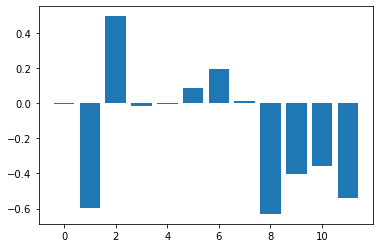

In [ ]:
# get importance
importance = svcc.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Feature Ranking

In [ ]:
importances = svcc.coef_[0]

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(Input_variables.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 2 (0.497290)
2. feature 6 (0.194752)
3. feature 5 (0.086988)
4. feature 7 (0.013302)
5. feature 4 (-0.001416)
6. feature 0 (-0.001988)
7. feature 3 (-0.014655)
8. feature 10 (-0.357849)
9. feature 9 (-0.400427)
10. feature 11 (-0.541670)
11. feature 1 (-0.597195)
12. feature 8 (-0.630814)


## Top 4 Features for SVC

In [ ]:
print("Top 4 Features for Support Vector Classifier are:")
df_fet_imp_svc=pd.DataFrame(df,columns=df.columns[[2,6,5,7]])
df_fet_imp_svc

Top 4 Features for Support Vector Classifier are:


,Chest_Pain_type,resting_electrocardiographic,fasting_blood_sugar,maximum_heart_rate
0,3,0,1,150
1,2,1,0,187
2,1,0,0,172
3,1,1,0,178
4,0,1,0,163
...,...,...,...,...
298,0,1,0,123
299,3,1,0,132
300,0,1,1,141
301,0,1,0,115


In [ ]:
df.head()

,age,sex,Chest_Pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,previous_peak,number_major_vessels,thal_rate,output
0,63,1,3,145,233,1,0,150,0,2.3,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,0,2,1


## Applications (SVC + RFC)

## Saving the models into disk

In [ ]:
svc_app = svcc.fit(Input_variables.values, Output_variable)
model_svc = 'Svc_model.sav'
joblib.dump(svc_app, model_svc)

['Svc_model.sav']

In [ ]:
rfc_app = rf_opt.fit(Input_variables.values, Output_variable)
model_rfc = 'Rfc_model.sav'
joblib.dump(rfc_app, model_rfc)

['Rfc_model.sav']

In [ ]:
df.tail()

,age,sex,Chest_Pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,previous_peak,number_major_vessels,thal_rate,output
298,57,0,0,140,241,0,1,123,1,0.2,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,2,0


## User Input

In [ ]:
age=int(input("Enter the age of Person Between 20 to 90 : "))
sex=int(input("Enter the Gender 0 for Female 1 for Male:  "))
Chest_Pain_type =int(input("Enter the chest_pain type between 0 to 3 : "))
resting_blood_pressure =int(input("Enter the resting_blood_pressure between 80 to 220 : "))
cholestoral =int(input("Enter the cholestoral between 100 to 600 : "))
fasting_blood_sugar =int(input("Enter the fasting_blood_sugar 0 for No and 1 for Yes : "))
resting_electrocardiographic =int(input("Enter the resting_electrocardiographic between 0,1 and 2 : "))
maximum_heart_rate =int(input("Enter the maximum_heart_rate between 50 to 230 : "))
exercise_induced_angina =int(input("Enter the exercise_induced_angina between 0 and 1 : "))
previous_peak =float(input("Enter the previous_peak between 0 to 7 : "))
number_major_vessels =int(input("Enter the number_major_vessels between 0 to 4 : "))
thal_rate =int(input("Enter the thal_rate between 0 to 4 : "))

Enter the age of Person Between 20 to 90 : 45
Enter the Gender 0 for Female 1 for Male:  1
Enter the chest_pain type between 0 to 3 : 2
Enter the resting_blood_pressure between 80 to 220 : 88
Enter the cholestoral between 100 to 600 : 345
Enter the fasting_blood_sugar 0 for No and 1 for Yes : 1
Enter the resting_electrocardiographic between 0,1 and 2 : 2
Enter the maximum_heart_rate between 50 to 230 : 78
Enter the exercise_induced_angina between 0 and 1 : 1
Enter the previous_peak between 0 to 7 : 3
Enter the number_major_vessels between 0 to 4 : 4
Enter the thal_rate between 0 to 4 : 2


## Convert User Input into array

In [ ]:
lst=[age, sex, Chest_Pain_type, resting_blood_pressure,
       cholestoral,fasting_blood_sugar, resting_electrocardiographic,
       maximum_heart_rate, exercise_induced_angina, previous_peak,
       number_major_vessels, thal_rate]
arry=np.array(lst)

print(arry)
test_array=arry.reshape(1, -1)
print(test_array)

[ 45.   1.   2.  88. 345.   1.   2.  78.   1.   3.   4.   2.]
[[ 45.   1.   2.  88. 345.   1.   2.  78.   1.   3.   4.   2.]]


## Loading the models from disk

In [ ]:
loaded_model_svc = joblib.load(model_svc)
loaded_model_rfc = joblib.load(model_rfc)

## Prediction From Both Classifiers

In [ ]:
#rf_opt.predict([[63,1,3,150,240,1,1,140,0,2.5,0,1]])
#svcc.predict([[63,1,3,150,240,1,1,140,0,2.5,0,1]])

Support_Vector=loaded_model_svc.predict(test_array[[0]])
print("Prediction with Supprt Vector Classifier: ",Support_Vector)

Random_Forest=loaded_model_rfc.predict(test_array[[0]])
print("Prediction with Random Forest Classifier: ",Random_Forest)

Prediction with Supprt Vector Classifier:  [0]
Prediction with Random Forest Classifier:  [0]
